In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Aug 25 09:10:28 2018', '__version__': '1.0', '__globals__': [], 'cleanedSignal': array([[-0.45891912, -0.47168064, -0.48151474, ..., -0.43723537,
        -0.44782886, -0.44533749]]), 'origSignal': array([[ 0.34069747, -0.29900363, -0.92773336, ...,  1.23675819,
        -0.77687497, -0.10484616]])}


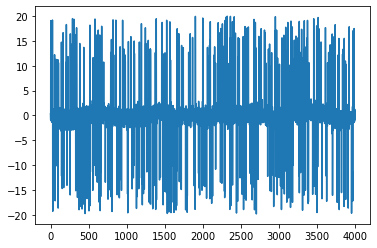

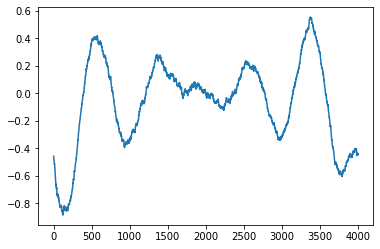

In [26]:
# import data
data = sio.loadmat('./denoising_codeChallenge.mat')
print(data)

origSignal = data["origSignal"][0]
cleanedSignal = data["cleanedSignal"][0]

n = len(origSignal)
# plot
plt.plot(range(0,n),origSignal)
plt.show()

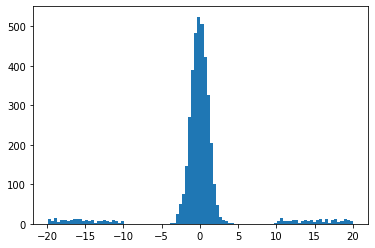

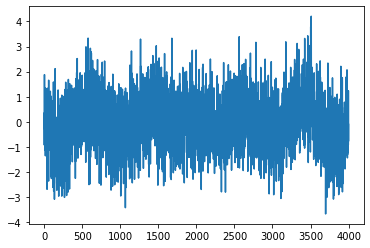

In [12]:
# use hist to pick threshold
plt.hist(origSignal,100)
plt.show()

suprathresh =  np.append(np.where( origSignal <-5)[0], np.where( origSignal >5)[0])


filtsig = copy.deepcopy(origSignal)

# loop through suprathreshold points and set to median of k
k = 10 # actual window is k*2+1
for ti in range(len(suprathresh)):
    # lower and upper bounds index
    lowbnd = np.max((0,suprathresh[ti]-k))
    uppbnd = np.min((suprathresh[ti]+k,n+1))
    # compute median of surrounding points
    filtsig[suprathresh[ti]] = np.median(origSignal[lowbnd:uppbnd])

plt.plot(range(0,n),filtsig)
plt.show()


In [13]:
## create Gaussian kernel
"""
# full-width half-maximum: the key Gaussian parameter
fwhm = 25 # in ms

# normalized time vector in ms
k = 100
gtime = 1000*np.arange(-k,k)/n

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

# compute empirical FWHM
pstPeakHalf = k + np.argmin( (gauswin[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauswin-.5)**2 )

empFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]

# show the Gaussian
plt.plot(gtime,gauswin,'ko-')
plt.plot([gtime[prePeakHalf],gtime[pstPeakHalf]],[gauswin[prePeakHalf],gauswin[pstPeakHalf]],'m')

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)
# title([ 'Gaussian kernel with requeted FWHM ' num2str(fwhm) ' ms (' num2str(empFWHM) ' ms achieved)' ])
plt.xlabel('Time (ms)')
plt.ylabel('Gain')

plt.show()


# initialize filtered signal vector
filtsigG = copy.deepcopy(filtsig)

# # implement the running mean filter
for i in range(k+1,n-k):
    # each point is the weighted average of k surrounding points
    filtsigG[i] = np.sum( filtsig[i-k:i+k]*gauswin )

plt.plot(range(0,n),filtsigG,'k',label='Gaussian-filtered')
"""

"\n# full-width half-maximum: the key Gaussian parameter\nfwhm = 25 # in ms\n\n# normalized time vector in ms\nk = 100\ngtime = 1000*np.arange(-k,k)/n\n\n# create Gaussian window\ngauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )\n\n# compute empirical FWHM\npstPeakHalf = k + np.argmin( (gauswin[k:]-.5)**2 )\nprePeakHalf = np.argmin( (gauswin-.5)**2 )\n\nempFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]\n\n# show the Gaussian\nplt.plot(gtime,gauswin,'ko-')\nplt.plot([gtime[prePeakHalf],gtime[pstPeakHalf]],[gauswin[prePeakHalf],gauswin[pstPeakHalf]],'m')\n\n# then normalize Gaussian to unit energy\ngauswin = gauswin / np.sum(gauswin)\n# title([ 'Gaussian kernel with requeted FWHM ' num2str(fwhm) ' ms (' num2str(empFWHM) ' ms achieved)' ])\nplt.xlabel('Time (ms)')\nplt.ylabel('Gain')\n\nplt.show()\n\n\n# initialize filtered signal vector\nfiltsigG = copy.deepcopy(filtsig)\n\n# # implement the running mean filter\nfor i in range(k+1,n-k):\n    # each point is the weighted average of k

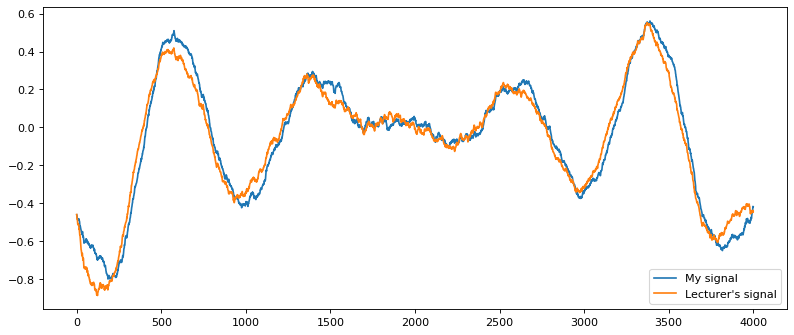

In [34]:
# implement the running mean filter

from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

# initialize filtered signal vector
meanSig = np.zeros(n)

# implement the running mean filter
k = 150 # filter window is actually k*2+1
for i in range(0,n):
    # each point is the average of k surrounding points
    # original approach

    left_bound = max(1, i-k)
    right_bound = min(i+k, n)
    meanSig[i] = np.mean(filtsig[left_bound:right_bound])

plt.plot(range(0,n),meanSig, label='My signal')
plt.plot(range(0,n),cleanedSignal, label='Lecturer\'s signal')
plt.legend()
plt.show()

In [15]:
# detrend
"""from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

# linear detrending
detsignal = scipy.signal.detrend(meanSig)

# get means
omean = np.mean(meanSig) # original mean
dmean = np.mean(detsignal) # detrended mean

# plot signal and detrended signal
plt.plot(range(0,n),meanSig,label='Original, mean=%d' %omean)
plt.plot(range(0,n),detsignal,label='Detrended, mean=%d' %dmean)
plt.show()"""

"from matplotlib.pyplot import figure\nfigure(figsize=(12, 5), dpi=80)\n\n# linear detrending\ndetsignal = scipy.signal.detrend(meanSig)\n\n# get means\nomean = np.mean(meanSig) # original mean\ndmean = np.mean(detsignal) # detrended mean\n\n# plot signal and detrended signal\nplt.plot(range(0,n),meanSig,label='Original, mean=%d' %omean)\nplt.plot(range(0,n),detsignal,label='Detrended, mean=%d' %dmean)\nplt.show()"